In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [207]:
import datetime

In [208]:
dataset = pd.read_csv("weblog.csv")
dataset.head()

,IP,Time,URL,Status
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1 ...,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1 ...,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1 ...,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1 ...,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1 ...,200


In [209]:
dataset.iloc[0:1, 0]

0    10.128.2.1 
Name: IP         , dtype: object

In [249]:
df = dataset.iloc[:580, :]
df.head()

,IP,Time,URL,Status
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1 ...,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1 ...,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1 ...,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1 ...,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1 ...,200


In [211]:
data = {
    "IP_Address": ["10.128.2.1"],
    "Time_Difference_Mean": [99],
    "Time_Difference_Variance": [54],
    "Time_Difference_Sum": [105],
    "Time_Difference_Maximum": [15],
    "Character-bigrams": [45],
    "Character-trigrams": [34],
    "Character-ngrams": [74],
    "Count_of_most_visited_page": [14],
    "Status": [200],
    "Number_of_records": [40],
}
work_dataset = pd.DataFrame(data)
work_dataset

,IP_Address,Time_Difference_Mean,Time_Difference_Variance,Time_Difference_Sum,Time_Difference_Maximum,Character-bigrams,Character-trigrams,Character-ngrams,Count_of_most_visited_page,Status,Number_of_records
0,10.128.2.1,99,54,105,15,45,34,74,14,200,40


In [212]:
def time_stats(dataframe):
    """
    Calculate time-based statistics from weblog time format [DD/MMM/YYYY:HH:MM:SS

    Args:
        dataframe: pandas DataFrame with time values in format [DD/MMM/YYYY:HH:MM:SS
    Returns:
        tuple: (max_time_diff, mean_time_diff, sum_time_diff, variance_time_diff)
    """
    if len(dataframe) <= 1:
        return 0, 0, 0, 0

    # Extract time from the format [DD/MMM/YYYY:HH:MM:SS
    def extract_time(time_str):
        # Remove leading [ and get the time part after :
        time_part = time_str.split(":", 1)[1].split(" ")[0]
        return datetime.datetime.strptime(time_part, "%H:%M:%S")

    # Process all times at once
    try:
        processed_times = [
            extract_time(str(time)) for time in dataframe.iloc[:, 1].values
        ]

        # Calculate time differences in seconds
        time_diffs = [
            (processed_times[i] - processed_times[i - 1]).seconds
            for i in range(1, len(processed_times))
        ]

        if not time_diffs:
            return 0, 0, 0, 0

        # Calculate statistics
        max_time_diff = max(time_diffs)
        sum_time_diff = sum(time_diffs)
        mean_time_diff = sum_time_diff / len(time_diffs)

        # Calculate variance
        variance_time_diff = sum(
            (diff - mean_time_diff) ** 2 for diff in time_diffs
        ) / len(time_diffs)

        return max_time_diff, mean_time_diff, sum_time_diff, variance_time_diff

    except (ValueError, IndexError) as e:
        print(f"Error processing times: {e}")
        return 0, 0, 0, 0

In [213]:
time_stats(df)

(23466, 95.58376511226253, 55343, 1112702.1497191428)

In [214]:
import re
import string
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import bigrams

In [215]:
def most_frequent(List):
    return max(set(List), key=List.count)

In [216]:
def bigram_stats(dataframe):
    url_array = dataframe.iloc[:, 2].values
    full_string = ""
    for url in url_array:
        full_string = full_string + url
    full_string = full_string.lower()
    full_string = re.sub(r"\d+", "", full_string)
    table = str.maketrans({key: None for key in string.punctuation})
    full_string = full_string.translate(table)
    full_string = full_string.strip()
    full_string_tokens = word_tokenize(full_string)
    for char in full_string_tokens:
        if char == "get":
            full_string_tokens.remove("get")
    for char in full_string_tokens:
        if char == "httpget":
            full_string_tokens.remove("httpget")
    for char in full_string_tokens:
        if char == "httppost":
            full_string_tokens.remove("httppost")
    for char in full_string_tokens:
        if char == "post":
            full_string_tokens.remove("post")

    count_most_visited_page = 0
    if len(full_string_tokens) != 0:
        most_visited_page = most_frequent(full_string_tokens)
        count_most_visited_page = full_string_tokens.count(most_visited_page)

    count_most_appearing_bigram = 0
    bigrams = list(nltk.bigrams(full_string_tokens))
    if len(bigrams) != 0:
        most_appearing_bigram = most_frequent(bigrams)
        count_most_appearing_bigram = bigrams.count(most_appearing_bigram)

    count_most_appearing_trigram = 0
    trigrams = list(nltk.trigrams(full_string_tokens))
    if len(trigrams) != 0:
        most_appearing_trigram = most_frequent(trigrams)
        count_most_appearing_trigram = trigrams.count(most_appearing_trigram)

    count_most_appearing_ngram = 0
    ngrams = list(nltk.ngrams(full_string_tokens, 6))
    if len(ngrams) != 0:
        most_appearing_ngram = most_frequent(ngrams)
        count_most_appearing_ngram = ngrams.count(most_appearing_ngram)

    return (
        count_most_visited_page,
        count_most_appearing_bigram,
        count_most_appearing_trigram,
        count_most_appearing_ngram,
    )

In [217]:
bigram_stats(df)

(580, 79, 79, 17)

In [218]:
from collections import Counter

In [219]:
def most_visited_ip(dataframe):
    ip = dataframe.iloc[:, 0].values
    x = Counter(ip)
    return x.most_common(1)[0][0]

In [220]:
most_visited_ip(df)

'10.131.2.1 '

In [221]:
def most_freq_status(dataframe):
    status = dataframe.iloc[:, 3].values
    x = Counter(status)
    return x.most_common(1)[0][0]

In [222]:
most_freq_status(df)

200

In [223]:
print(dataset.columns)

Index(['IP         ', 'Time                  ',
       'URL                                                                          ',
       'Status'],
      dtype='object')


In [224]:
# Strip spaces from column names to avoid KeyError
dataset.columns = dataset.columns.str.strip()

startindex = 0
endindex = 0
prevdate = ""
p = 1

# Ensure work_dataset has the correct columns
work_dataset = pd.DataFrame(
    columns=[
        "Character-bigrams",
        "Character-ngrams",
        "Character-trigrams",
        "Count_of_most_visited_page",
        "IP_Address",
        "Number_of_records",
        "Status",
        "Time_Difference_Maximum",
        "Time_Difference_Mean",
        "Time_Difference_Sum",
        "Time_Difference_Variance",
    ]
)

for i, row in dataset.iterrows():
    date = row["Time"][1:12]  # Now 'Time' is correctly referenced
    if i == 0:
        prevdate = date
    else:
        if date == prevdate:
            endindex += 1
        else:
            data = dataset.iloc[startindex : endindex + 1, :]
            max_time_diff, mean_time_diff, sum_time_diff, variance_time_diff = (
                time_stats(data)
            )
            (
                count_most_visited_page,
                count_most_appearing_bigram,
                count_most_appearing_trigram,
                count_most_appearing_ngram,
            ) = bigram_stats(data)
            most_vis_ip = most_visited_ip(data)
            most_frequent_status = most_freq_status(data)
            most_vis_ip = most_vis_ip if most_vis_ip else "10.130.2.1"
            most_frequent_status = most_frequent_status if most_frequent_status else 200

            work_dataset.loc[p] = [
                count_most_appearing_bigram,
                count_most_appearing_ngram,
                count_most_appearing_trigram,
                count_most_visited_page,
                most_vis_ip,
                endindex - startindex + 1,
                most_frequent_status,
                max_time_diff,
                mean_time_diff,
                sum_time_diff,
                variance_time_diff,
            ]
            startindex = endindex + 1
            endindex = startindex
            prevdate = date
            p += 1

# Process the last date range
data = dataset.iloc[startindex : endindex + 1, :]
max_time_diff, mean_time_diff, sum_time_diff, variance_time_diff = time_stats(data)
(
    count_most_visited_page,
    count_most_appearing_bigram,
    count_most_appearing_trigram,
    count_most_appearing_ngram,
) = bigram_stats(data)
most_vis_ip = most_visited_ip(data)
most_frequent_status = most_freq_status(data)
most_vis_ip = most_vis_ip if most_vis_ip else "10.130.2.1"
most_frequent_status = most_frequent_status if most_frequent_status else 200

work_dataset.loc[p] = [
    count_most_appearing_bigram,
    count_most_appearing_ngram,
    count_most_appearing_trigram,
    count_most_visited_page,
    most_vis_ip,
    endindex - startindex + 1,
    most_frequent_status,
    max_time_diff,
    mean_time_diff,
    sum_time_diff,
    variance_time_diff,
]

In [225]:
work_dataset

,Character-bigrams,Character-ngrams,Character-trigrams,Count_of_most_visited_page,IP_Address,Number_of_records,Status,Time_Difference_Maximum,Time_Difference_Mean,Time_Difference_Sum,Time_Difference_Variance
1,79,17,79,580,10.131.2.1,580,200,23466,95.583765,55343,1.112702e+06
2,343,55,343,2991,10.131.0.1,2991,200,86399,137.785619,411979,1.002908e+07
3,43,11,43,468,10.131.0.1,468,200,9569,176.946467,82634,7.574201e+05
4,32,13,32,168,10.130.2.1,168,200,7712,434.892216,72627,1.795816e+06
5,10,3,10,105,10.129.2.1,105,200,13451,579.701923,60289,4.197615e+06
...,...,...,...,...,...,...,...,...,...,...,...
64,20,4,20,98,10.131.0.1,98,200,12239,692.422680,67165,5.617527e+06
65,13,4,13,83,10.128.2.1,83,200,37698,939.073171,77004,2.056082e+07
66,18,3,18,123,10.130.2.1,123,200,22220,541.860656,66107,6.733263e+06
67,9,2,9,31,10.130.2.1,31,200,17908,1564.000000,46920,1.698140e+07


In [226]:
import numpy as np

Ip_rep = []
for i, row in work_dataset.iterrows():
    ip = str(row.iloc[4])  # Convert to string
    if ip == "nan":  # Handle missing values
        ip = "0.0.0.0"  # Assign a default IP like "0.0.0.0"
    ip = ip.replace(".", "")  # Remove dots
    a = int(ip)  # Convert to integer
    Ip_rep.append(a)  # Append to list

# Convert list to NumPy array and add to DataFrame
work_dataset["IP_rep"] = np.array(Ip_rep)

In [227]:
work_dataset

,Character-bigrams,Character-ngrams,Character-trigrams,Count_of_most_visited_page,IP_Address,Number_of_records,Status,Time_Difference_Maximum,Time_Difference_Mean,Time_Difference_Sum,Time_Difference_Variance,IP_rep
1,79,17,79,580,10.131.2.1,580,200,23466,95.583765,55343,1.112702e+06,1013121
2,343,55,343,2991,10.131.0.1,2991,200,86399,137.785619,411979,1.002908e+07,1013101
3,43,11,43,468,10.131.0.1,468,200,9569,176.946467,82634,7.574201e+05,1013101
4,32,13,32,168,10.130.2.1,168,200,7712,434.892216,72627,1.795816e+06,1013021
5,10,3,10,105,10.129.2.1,105,200,13451,579.701923,60289,4.197615e+06,1012921
...,...,...,...,...,...,...,...,...,...,...,...,...
64,20,4,20,98,10.131.0.1,98,200,12239,692.422680,67165,5.617527e+06,1013101
65,13,4,13,83,10.128.2.1,83,200,37698,939.073171,77004,2.056082e+07,1012821
66,18,3,18,123,10.130.2.1,123,200,22220,541.860656,66107,6.733263e+06,1013021
67,9,2,9,31,10.130.2.1,31,200,17908,1564.000000,46920,1.698140e+07,1013021


In [228]:
work_dataset.drop("IP_Address", axis=1, inplace=True)

In [229]:
work_dataset

,Character-bigrams,Character-ngrams,Character-trigrams,Count_of_most_visited_page,Number_of_records,Status,Time_Difference_Maximum,Time_Difference_Mean,Time_Difference_Sum,Time_Difference_Variance,IP_rep
1,79,17,79,580,580,200,23466,95.583765,55343,1.112702e+06,1013121
2,343,55,343,2991,2991,200,86399,137.785619,411979,1.002908e+07,1013101
3,43,11,43,468,468,200,9569,176.946467,82634,7.574201e+05,1013101
4,32,13,32,168,168,200,7712,434.892216,72627,1.795816e+06,1013021
5,10,3,10,105,105,200,13451,579.701923,60289,4.197615e+06,1012921
...,...,...,...,...,...,...,...,...,...,...,...
64,20,4,20,98,98,200,12239,692.422680,67165,5.617527e+06,1013101
65,13,4,13,83,83,200,37698,939.073171,77004,2.056082e+07,1012821
66,18,3,18,123,123,200,22220,541.860656,66107,6.733263e+06,1013021
67,9,2,9,31,31,200,17908,1564.000000,46920,1.698140e+07,1013021


In [230]:
X = work_dataset.iloc[:, :].values

In [231]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 1.08427878e-01, -3.38121528e-03,  1.09701660e-01,
         5.00889329e-01,  5.00889329e-01, -1.74077656e-01,
         2.55669117e-02, -9.45046464e-01, -2.91818905e-01,
        -5.50513185e-01,  1.20382379e+00],
       [ 1.19041636e+00,  4.56464063e-01,  1.19475081e+00,
         3.97289185e+00,  3.97289185e+00, -1.74077656e-01,
         2.90984400e+00, -8.91949027e-01,  5.04153199e+00,
        -1.58405362e-01,  1.01692877e+00],
       [-3.91160050e-02, -7.59883645e-02, -3.82595873e-02,
         3.39601779e-01,  3.39601779e-01, -1.74077656e-01,
        -6.11345339e-01, -8.42677715e-01,  1.16307250e-01,
        -5.66137114e-01,  1.01692877e+00],
       [-8.41988583e-02, -5.17859814e-02, -8.34699686e-02,
        -9.24184437e-02, -9.24184437e-02, -1.74077656e-01,
        -6.96453352e-01, -5.18136085e-01, -3.33434935e-02,
        -5.20472495e-01,  2.69348702e-01],
       [-1.74364565e-01, -1.72797897e-01, -1.73890731e-01,
        -1.83142690e-01, -1.83142690e-01, -1.74077656e-01,
  

In [232]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)

In [233]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [234]:
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 4, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0])

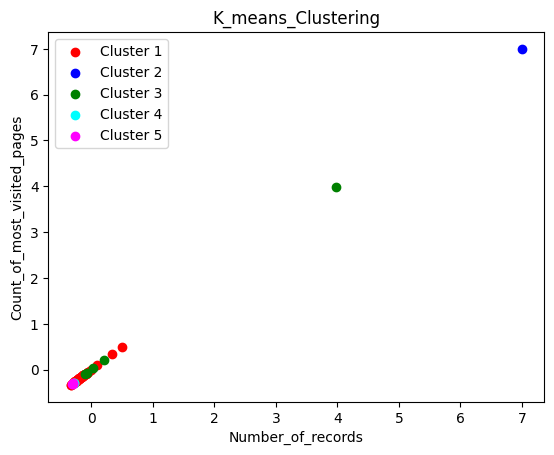

In [235]:
plt.scatter(X[y_kmeans == 0, 4], X[y_kmeans == 0, 3], c="red", label="Cluster 1")
plt.scatter(X[y_kmeans == 1, 4], X[y_kmeans == 1, 3], c="blue", label="Cluster 2")
plt.scatter(X[y_kmeans == 2, 4], X[y_kmeans == 2, 3], c="green", label="Cluster 3")
plt.scatter(X[y_kmeans == 3, 4], X[y_kmeans == 3, 3], c="cyan", label="Cluster 4")
plt.scatter(X[y_kmeans == 4, 4], X[y_kmeans == 4, 3], c="magenta", label="Cluster 5")
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title("K_means_Clustering")
plt.xlabel("Number_of_records")
plt.ylabel("Count_of_most_visited_pages")
plt.legend()
plt.show()

In [236]:
import seaborn as sns

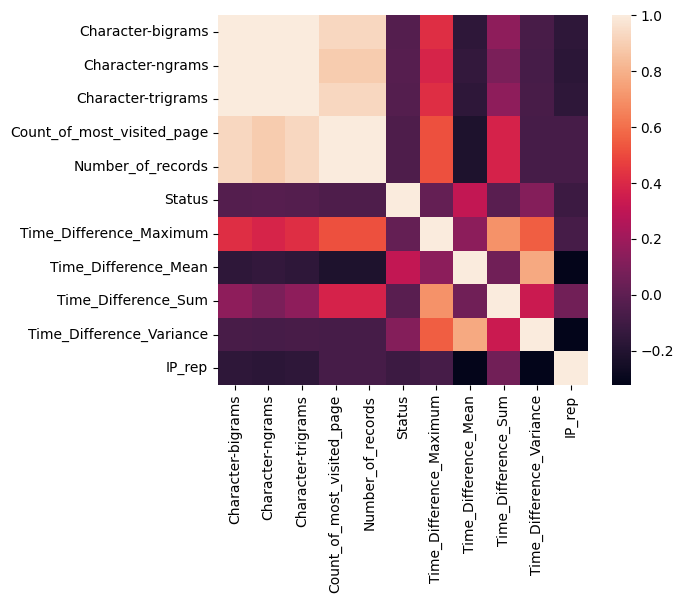

In [237]:
cor = work_dataset.corr()
sns.heatmap(cor, square=True)
plt.show()

In [238]:
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation

In [239]:
model = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
clust_labels1 = model.fit_predict(X)
clust_labels1

array([0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [240]:
agglomerative = pd.DataFrame(clust_labels1)

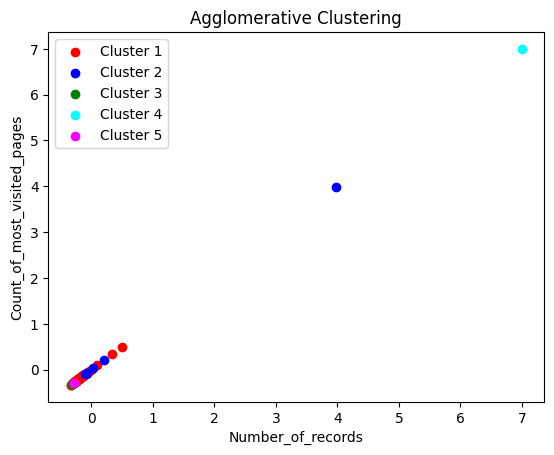

In [241]:
plt.scatter(
    X[clust_labels1 == 0, 4], X[clust_labels1 == 0, 3], c="red", label="Cluster 1"
)
plt.scatter(
    X[clust_labels1 == 1, 4], X[clust_labels1 == 1, 3], c="blue", label="Cluster 2"
)
plt.scatter(
    X[clust_labels1 == 2, 4], X[clust_labels1 == 2, 3], c="green", label="Cluster 3"
)
plt.scatter(
    X[clust_labels1 == 3, 4], X[clust_labels1 == 3, 3], c="cyan", label="Cluster 4"
)
plt.scatter(
    X[clust_labels1 == 4, 4], X[clust_labels1 == 4, 3], c="magenta", label="Cluster 5"
)
plt.title("Agglomerative Clustering")
plt.xlabel("Number_of_records")
plt.ylabel("Count_of_most_visited_pages")
plt.legend()
plt.show()

In [242]:
model_affinity = AffinityPropagation(damping=0.5, max_iter=250, affinity="euclidean")
model_affinity.fit(X)
clust_labels2 = model_affinity.predict(X)
cent2 = model_affinity.cluster_centers_
affinity = pd.DataFrame(clust_labels2)

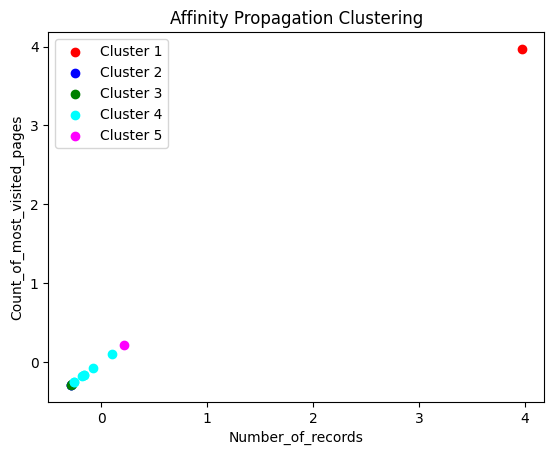

In [243]:
plt.scatter(
    X[clust_labels2 == 0, 4], X[clust_labels2 == 0, 3], c="red", label="Cluster 1"
)
plt.scatter(
    X[clust_labels2 == 1, 4], X[clust_labels2 == 1, 3], c="blue", label="Cluster 2"
)
plt.scatter(
    X[clust_labels2 == 2, 4], X[clust_labels2 == 2, 3], c="green", label="Cluster 3"
)
plt.scatter(
    X[clust_labels2 == 3, 4], X[clust_labels2 == 3, 3], c="cyan", label="Cluster 4"
)
plt.scatter(
    X[clust_labels2 == 4, 4], X[clust_labels2 == 4, 3], c="magenta", label="Cluster 5"
)
plt.title("Affinity Propagation Clustering")
plt.xlabel("Number_of_records")
plt.ylabel("Count_of_most_visited_pages")
plt.legend()
plt.show()

In [244]:
from sklearn.cluster import SpectralClustering

In [245]:
clustering = SpectralClustering(
    n_clusters=5, assign_labels="discretize", random_state=0
).fit(X)
clust_labels3 = clustering.labels_

In [246]:
clust_labels3

array([3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 1, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3], dtype=int64)

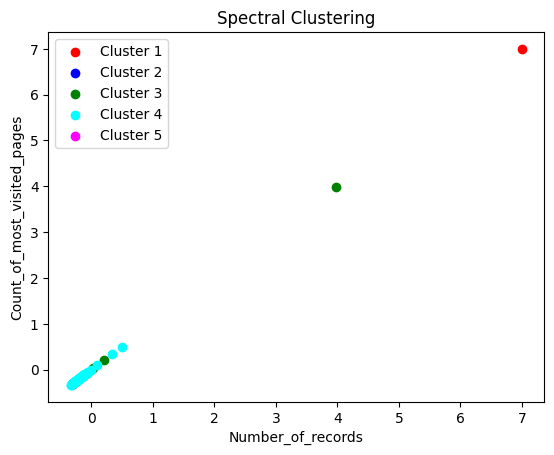

In [248]:
plt.scatter(
    X[clust_labels3 == 0, 4], X[clust_labels3 == 0, 3], c="red", label="Cluster 1"
)
plt.scatter(
    X[clust_labels3 == 1, 4], X[clust_labels3 == 1, 3], c="blue", label="Cluster 2"
)
plt.scatter(
    X[clust_labels3 == 2, 4], X[clust_labels3 == 2, 3], c="green", label="Cluster 3"
)
plt.scatter(
    X[clust_labels3 == 3, 4], X[clust_labels3 == 3, 3], c="cyan", label="Cluster 4"
)
plt.scatter(
    X[clust_labels3 == 4, 4], X[clust_labels3 == 4, 3], c="magenta", label="Cluster 5"
)
plt.title("Spectral Clustering")
plt.xlabel("Number_of_records")
plt.ylabel("Count_of_most_visited_pages")
plt.legend()
plt.show()